In [30]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [9]:
# Extract data and check format
filename = 'covid_data_extract.csv'
data = pd.read_csv(filename)
print(data.head())

  continent     location        date  population  total_cases  total_deaths  \
0      Asia  Afghanistan  2020-01-05    41128772          NaN           NaN   
1      Asia  Afghanistan  2020-01-06    41128772          NaN           NaN   
2      Asia  Afghanistan  2020-01-07    41128772          NaN           NaN   
3      Asia  Afghanistan  2020-01-08    41128772          NaN           NaN   
4      Asia  Afghanistan  2020-01-09    41128772          NaN           NaN   

   mortality  new_vaccinations  cumul_vaccines  vaccines_per_pop  
0        NaN               NaN             NaN               NaN  
1        NaN               NaN             NaN               NaN  
2        NaN               NaN             NaN               NaN  
3        NaN               NaN             NaN               NaN  
4        NaN               NaN             NaN               NaN  


In [10]:
# Drop rows with no meaningful data
data = data.dropna(subset=['total_cases','total_deaths','cumul_vaccines'])
print(data.tail())

       continent  location        date  population  total_cases  total_deaths  \
375268    Africa  Zimbabwe  2024-04-10    16320539     266359.0        5740.0   
375269    Africa  Zimbabwe  2024-04-11    16320539     266359.0        5740.0   
375270    Africa  Zimbabwe  2024-04-12    16320539     266359.0        5740.0   
375271    Africa  Zimbabwe  2024-04-13    16320539     266359.0        5740.0   
375272    Africa  Zimbabwe  2024-04-14    16320539     266359.0        5740.0   

        mortality  new_vaccinations  cumul_vaccines  vaccines_per_pop  
375268   2.154986               NaN      10801392.0          0.661828  
375269   2.154986               NaN      10801392.0          0.661828  
375270   2.154986               NaN      10801392.0          0.661828  
375271   2.154986               NaN      10801392.0          0.661828  
375272   2.154986               NaN      10801392.0          0.661828  


In [11]:
data_latest = data[data['date'] == '2024-04-14']
print(data_latest)

            continent     location        date  population  total_cases  \
1561             Asia  Afghanistan  2024-04-14    41128772     233472.0   
3123           Europe      Albania  2024-04-14     2842318     334863.0   
4685           Africa      Algeria  2024-04-14    44903228     272021.0   
7809           Europe      Andorra  2024-04-14       79843      48015.0   
10933   North America     Anguilla  2024-04-14       15877       3904.0   
...               ...          ...         ...         ...          ...   
360015  South America      Uruguay  2024-04-14     3422796    1037893.0   
361577           Asia   Uzbekistan  2024-04-14    34627648     175081.0   
367825           Asia      Vietnam  2024-04-14    98186856   11624000.0   
373710         Africa       Zambia  2024-04-14    20017670     349616.0   
375272         Africa     Zimbabwe  2024-04-14    16320539     266359.0   

        total_deaths  mortality  new_vaccinations  cumul_vaccines  \
1561          7985.0   3.42011

<AxesSubplot:xlabel='vaccines_per_pop', ylabel='mortality'>

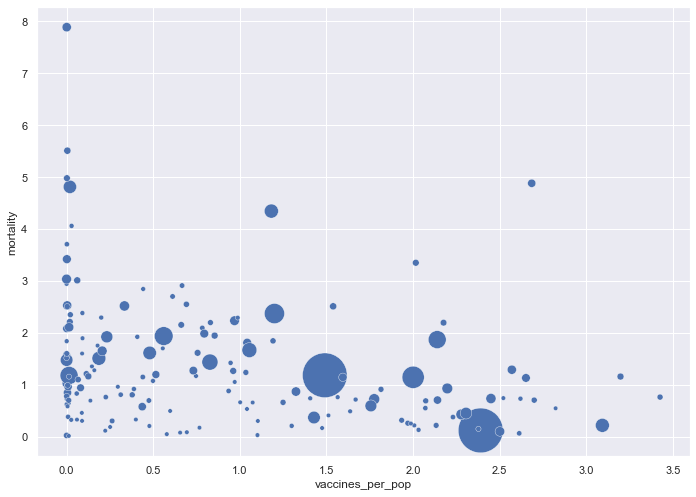

In [40]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    x='vaccines_per_pop',
    y='mortality',
    data=data_latest,
    size='population',
    sizes=(20,2000),
    legend=False
)

There are many countries that have vaccinated a very small number of people, which have a range of mortality rates.

Most countries with high vaccination rates have low mortality rates, but there are some outliers.

Focusing on higher population countries (which may also be higher population density countries), there appears to be a mild negative correlation between vaccination rates and mortality rates.

In [15]:
data_latest[data_latest['mortality']>3]

,continent,location,date,population,total_cases,total_deaths,mortality,new_vaccinations,cumul_vaccines,vaccines_per_pop
1561,Asia,Afghanistan,2024-04-14,41128772,233472.0,7985.0,3.420110,NaN,78275.0,0.001903
42192,Europe,Bosnia and Herzegovina,2024-04-14,3233530,403633.0,16388.0,4.060124,NaN,93862.0,0.029028
93778,South America,Ecuador,2024-04-14,18001002,1075965.0,36048.0,3.350295,NaN,36284797.0,2.015710
95340,Africa,Egypt,2024-04-14,110990096,516023.0,24830.0,4.811801,NaN,2157499.0,0.019439
185755,Africa,Liberia,2024-04-14,5302690,7930.0,294.0,3.707440,NaN,10089.0,0.001903
195937,Africa,Malawi,2024-04-14,20405318,89168.0,2686.0,3.012291,NaN,1256993.0,0.061601
211576,North America,Mexico,2024-04-14,127504120,7709747.0,335011.0,4.345292,NaN,150702693.0,1.181944
225634,Asia,Myanmar,2024-04-14,54179312,642013.0,19494.0,3.036387,NaN,3800.0,0.000070
262075,South America,Peru,2024-04-14,34049588,4524748.0,220831.0,4.880515,NaN,91408722.0,2.684576
311802,Africa,Somalia,2024-04-14,17597508,27334.0,1361.0,4.979147,NaN,37292.0,0.002119


It might be that these high-vaccine, high-mortality countries had a very high number of deaths early on in the pandemic and pushed vaccines aggressively later on. Let's check the trajectories for Peru and Ecuador.

<AxesSubplot:xlabel='date'>

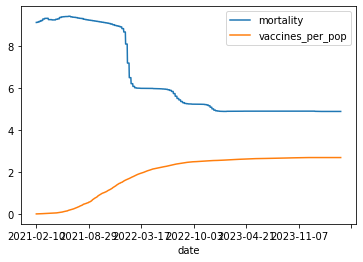

In [16]:
data[data['location']=='Peru'].plot(x='date',y=['mortality','vaccines_per_pop'], kind='line')

<AxesSubplot:xlabel='date'>

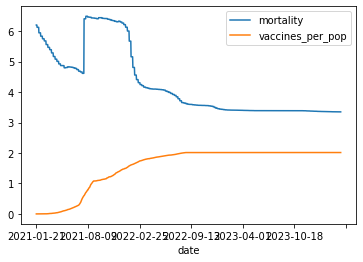

In [18]:
data[data['location']=='Ecuador'].plot(x='date',y=['mortality','vaccines_per_pop'], kind='line')
# Something weird is going on with Ecuador's mortality data, probably a reporting or testing quirk. Trend looks ok.

<AxesSubplot:xlabel='date'>

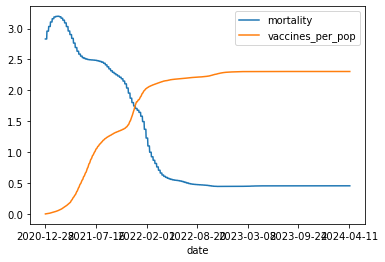

In [21]:
data[data['location']=='Germany'].plot(x='date',y=['mortality','vaccines_per_pop'], kind='line')

Now let's ignore the date and check the relationship between mortality and vaccination rates directly

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='vaccines_per_pop', ylabel='mortality'>

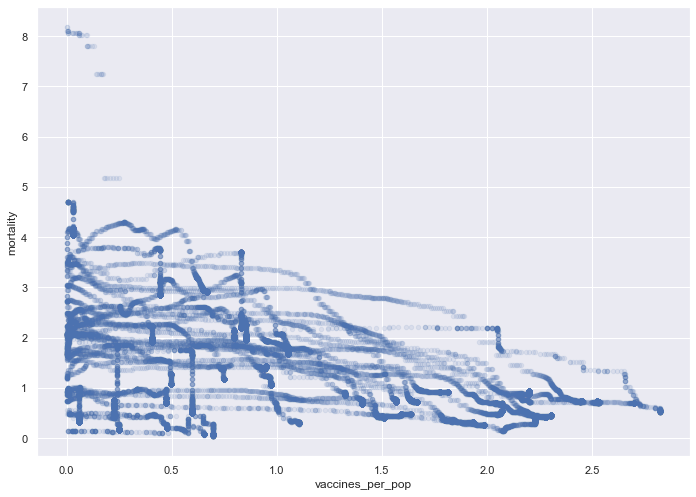

In [51]:
data[data['continent']=='Europe'].plot(x='vaccines_per_pop', y='mortality', kind='scatter', alpha=0.1)

Restricting the data to just Europe for ease of visual inspection: in general it looks like as vaccination rates go up, mortality goes down (albeit there are some countries where mortality jumps slightly before falling again).

In [56]:
data[data['location']=='Germany']['vaccines_per_pop'].corr(data[data['location']=='Germany']['mortality'])

-0.9683410339247734

In [110]:
data_latest[data_latest['location']=='Greece'].continent.iloc[0]

'Europe'

In [111]:
corr = pd.DataFrame(columns=['location','continent','correlation'])
corr_list = []
countries = data_latest['location']
for country in countries:
    continent = data_latest[data_latest['location']==country]['continent'].iloc[0]
    correlation = data[data['location']==country]['vaccines_per_pop'].corr(data[data['location']==country]['mortality'])
    new_row = pd.DataFrame({'location':country,
                            'continent':continent,
                            'correlation': correlation}, index=[country])
    new_row = new_row.set_index('location')  # Set 'location' as index
    corr_list.append(new_row)

corr = pd.concat(corr_list, ignore_index=False)

In [112]:
corr = corr.sort_values(by='correlation', ascending = True)
corr

,continent,correlation
location,,
Greece,Europe,-0.988170
New Zealand,Oceania,-0.985170
Australia,Oceania,-0.979494
Ireland,Europe,-0.979158
Argentina,South America,-0.977489
...,...,...
Fiji,Oceania,NaN
Gabon,Africa,NaN
Guinea-Bissau,Africa,NaN


<AxesSubplot:xlabel='continent', ylabel='correlation'>

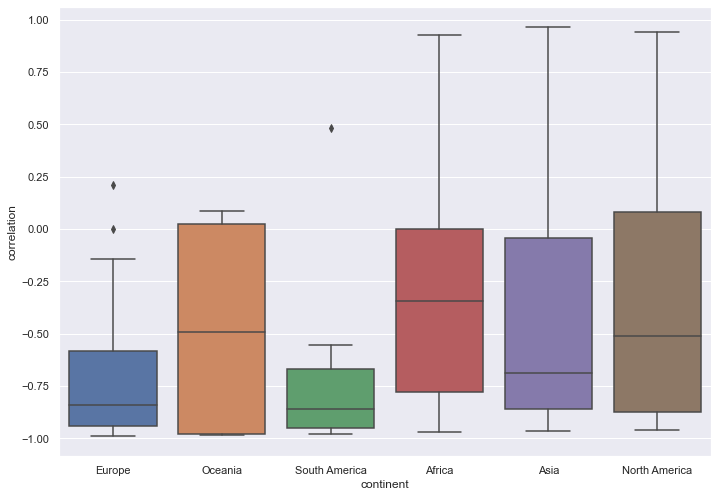

In [114]:
sns.boxplot(x='continent', y='correlation', data = corr)

This analysis shows that generally Covid-19 mortality rates correlate negatively with vaccination rates. This correlation is strongest in Europe and South America, and weaker in Africa, Asia, and North America. This may reflect the greater range of economic development levels in these continents (remembering that North America includes, for example, Nicaragua, Cuba, Jamaica etc as well as the USA).